In [1]:
import time
import pandas as pd
import numpy as np
from copy import deepcopy
import sys
import os
import csv
from itertools import cycle
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# warnings.resetwarnings() # To change it back (optional)

sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.similarity_scores import get_scores
from scripts.nets_and_embeddings import *

In [2]:
params = {
    "N": 1000,
    "k": 50,
    "maxk": 100,
    "minc": 20,
    "maxc": 100,
    "tau": 3.0,
    "tau2": 1.0,
    "mu": 0.2,
}

emb_params = {
    "method": "node2vec",
    "window_length": 10,
    "walk_length": 80,
    "num_walks": 10,
    "dim": 512,
}


num_cores = 10

runs = np.arange(1, 11)

test_run=False

device_names = [f"cuda:{i}" for i in [0,1,2,3]]  # ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3']

path_name = f"/nobackup/gogandhi/alt_means_sans_k/data/experiment_dim_change_{params['N']}_{params['k']}_{params['tau']}"
if test_run:
    path_name += "_test_run"


#################### End of Params #################

#if not os.path.isdir(path_name):
#    os.mkdir(path_name)

def create_unique_folder(base_folder):
    if os.path.exists(base_folder):
        index = 1
        while True:
            new_folder = f"{base_folder}_{index}"
            if not os.path.exists(new_folder):
                break
            index += 1
    else:
        new_folder = base_folder

    os.mkdir(new_folder)
    return new_folder
    
path_name = create_unique_folder(path_name)


In [3]:
# First let's create networks and embeddings first, and then run clustering:
runs = np.arange(1, 11)
mu_values = np.round(np.arange(0, 1.05, 0.05),decimals=2)
dimensions = [512,256,128,64,32]

for dimension in dimensions:
    
    start_dim_time = time.perf_counter()
    temp_emb_params = deepcopy(emb_params)
    temp_emb_params['dim']= dimension
    
    for run_no in runs:
        start_time = time.perf_counter()
        

        if not os.path.exists(f"{path_name}/Run_{run_no}/"):
            os.mkdir(f"{path_name}/Run_{run_no}/")
        
        for mu in mu_values:
            
            temp_params = deepcopy(params)
            
            temp_params['mu']= mu
            
            net, comm, emb = create_and_save_network_and_embedding(temp_params,temp_emb_params, f"{path_name}/Run_{run_no}/")
            print(dimension, run_no, mu)

        print(f"Run took: {time.perf_counter() - start_time}, avg time per mu_val: {(time.perf_counter() - start_time)/len(mu_values)}")
    print(f"Dim {dimension} took:{time.perf_counter() - start_dim_time} ") 

512 1 0.0
512 1 0.05
512 1 0.1
512 1 0.15
512 1 0.2
512 1 0.25
512 1 0.3
512 1 0.35
512 1 0.4
512 1 0.45
512 1 0.5
512 1 0.55
512 1 0.6
512 1 0.65
512 1 0.7
512 1 0.75
512 1 0.8
512 1 0.85
512 1 0.9
512 1 0.95
512 1 1.0
Run took: 198.53876203577965, avg time per mu_val: 9.454227133831452
512 2 0.0
512 2 0.05
512 2 0.1
512 2 0.15
512 2 0.2
512 2 0.25
512 2 0.3
512 2 0.35
512 2 0.4
512 2 0.45
512 2 0.5
512 2 0.55
512 2 0.6
512 2 0.65
512 2 0.7
512 2 0.75
512 2 0.8
512 2 0.85
512 2 0.9
512 2 0.95
512 2 1.0
Run took: 200.95541849546134, avg time per mu_val: 9.569306070428519
512 3 0.0
512 3 0.05
512 3 0.1
512 3 0.15
512 3 0.2
512 3 0.25
512 3 0.3
512 3 0.35
512 3 0.4
512 3 0.45
512 3 0.5
512 3 0.55
512 3 0.6
512 3 0.65
512 3 0.7
512 3 0.75
512 3 0.8
512 3 0.85
512 3 0.9
512 3 0.95
512 3 1.0
Run took: 196.98227629158646, avg time per mu_val: 9.380108760137643
512 4 0.0
512 4 0.05
512 4 0.1
512 4 0.15
512 4 0.2
512 4 0.25
512 4 0.3
512 4 0.35
512 4 0.4
512 4 0.45
512 4 0.5
512 4 0.55
512 4 0

128 9 0.05
128 9 0.1
128 9 0.15
128 9 0.2
128 9 0.25
128 9 0.3
128 9 0.35
128 9 0.4
128 9 0.45
128 9 0.5
128 9 0.55
128 9 0.6
128 9 0.65
128 9 0.7
128 9 0.75
128 9 0.8
128 9 0.85
128 9 0.9
128 9 0.95
128 9 1.0
Run took: 83.23944602999836, avg time per mu_val: 3.963783455923909
128 10 0.0
128 10 0.05
128 10 0.1
128 10 0.15
128 10 0.2
128 10 0.25
128 10 0.3
128 10 0.35
128 10 0.4
128 10 0.45
128 10 0.5
128 10 0.55
128 10 0.6
128 10 0.65
128 10 0.7
128 10 0.75
128 10 0.8
128 10 0.85
128 10 0.9
128 10 0.95
128 10 1.0
Run took: 83.19384928792715, avg time per mu_val: 3.961612147234735
Dim 128 took:832.5398264965042 
64 1 0.0
64 1 0.05
64 1 0.1
64 1 0.15
64 1 0.2
64 1 0.25
64 1 0.3
64 1 0.35
64 1 0.4
64 1 0.45
64 1 0.5
64 1 0.55
64 1 0.6
64 1 0.65
64 1 0.7
64 1 0.75
64 1 0.8
64 1 0.85
64 1 0.9
64 1 0.95
64 1 1.0
Run took: 72.24650890287012, avg time per mu_val: 3.440310208925179
64 2 0.0
64 2 0.05
64 2 0.1
64 2 0.15
64 2 0.2
64 2 0.25
64 2 0.3
64 2 0.35
64 2 0.4
64 2 0.45
64 2 0.5
64 2 0.55


In [4]:
# Once all networks are gotten, get all scores. 
# We are doing 5 x 10 x 20 nets for some 6
# and get their similarity scores.

def process_and_save_result(run_no, mu, dim, path_name, score_keys, device_name, emb_params, params,csv_file_path):
    start_time = time.perf_counter()

    if not os.path.isdir(f"{path_name}/Run_{run_no}/"):
        os.mkdir(f"{path_name}/Run_{run_no}/")

    params['mu'] = mu
    emb_params['dim'] = dim
    
    result_run_mu = get_scores(params, emb_params, score_keys, f"{path_name}/Run_{run_no}/", device_name)
    
    with open(csv_file_path, 'a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([run_no, mu, dim] + [result_run_mu[key] for key in score_keys])
        
    elapsed_time = time.perf_counter() - start_time
    
    print(run_no,mu,dim, elapsed_time)
    return run_no, mu, result_run_mu

In [5]:
#If you want to test faster for results, remove belief_prop, then optics and dbscan for now and add them separately.
score_keys = ['kmeans', 'proposed']
runs = np.arange(1, 11)
mu_values = np.round(np.arange(0, 1.05, 0.05),decimals=2)
dimensions = [512,256,128,64,32]

csv_file_path = path_name + "/result_stream.csv"

print("Hello, you can find results at:\n",path_name)

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['run_no', 'mu','dim'] + score_keys)
    
    

for run_no in runs:
    start_dim_time = time.perf_counter()

    for dimension in dimensions:

        start_time = time.perf_counter()

        for mu, device_name in zip(mu_values, cycle(device_names)):

            run_no, mu, result_run_mu = process_and_save_result(run_no, mu,dimension, path_name, score_keys, device_name, deepcopy(emb_params), deepcopy(params), csv_file_path)

        print(f"Run took: {time.perf_counter() - start_time}, avg time per mu_val: {(time.perf_counter() - start_time)/len(mu_values)}")
    
    print(f"Run took: {time.perf_counter() - start_dim_time}")

Hello, you can find results at:
 /nobackup/gogandhi/alt_means_sans_k/data/experiment_dim_change_1000_50_3.0
1 0.0 512 3.309682690538466
1 0.05 512 2.751927406527102
1 0.1 512 2.2080426244065166
1 0.15 512 2.244216567836702
1 0.2 512 2.660676995292306
1 0.25 512 2.565976571291685
1 0.3 512 2.371405572630465
1 0.35 512 2.3451219694688916
1 0.4 512 2.773780236952007
1 0.45 512 2.6513253217563033
1 0.5 512 2.328118631616235
1 0.55 512 2.3185887783765793
1 0.6 512 2.7997551895678043
1 0.65 512 2.9898652508854866
1 0.7 512 2.8777812169864774
1 0.75 512 4.564783435314894
1 0.8 512 7.5932160541415215
1 0.85 512 6.382317874580622
1 0.9 512 7.139577626250684
1 0.95 512 6.956754877232015
1 1.0 512 8.333700582385063
Run took: 80.1719049634412, avg time per mu_val: 3.8177102102144134
1 0.0 256 1.9442543126642704
1 0.05 256 1.9547223038971424
1 0.1 256 1.5777410361915827
1 0.15 256 1.6565558444708586
1 0.2 256 1.964575370773673
1 0.25 256 1.924263585358858
1 0.3 256 1.6483878530561924
1 0.35 256 1.5

3 0.0 128 1.6203672755509615
3 0.05 128 1.6171696111559868
3 0.1 128 1.2244946099817753
3 0.15 128 1.2052546804770827
3 0.2 128 1.648778485134244
3 0.25 128 1.753716604784131
3 0.3 128 1.2408687742426991
3 0.35 128 1.427841235883534
3 0.4 128 1.8386192480102181
3 0.45 128 1.6990425447002053
3 0.5 128 1.2525594718754292
3 0.55 128 1.252032876946032
3 0.6 128 1.8359687002375722
3 0.65 128 1.9040081687271595
3 0.7 128 1.9741868246346712
3 0.75 128 2.8093837974593043
3 0.8 128 4.594110439531505
3 0.85 128 8.378628167323768
3 0.9 128 5.71056847833097
3 0.95 128 6.81651680264622
3 1.0 128 8.958020097576082
Run took: 60.765396556816995, avg time per mu_val: 2.893590665244985
3 0.0 64 1.5191523181274533
3 0.05 64 1.5181115455925465
3 0.1 64 1.0782863637432456
3 0.15 64 1.0359745025634766
3 0.2 64 1.5093985758721828
3 0.25 64 1.6646689791232347
3 0.3 64 1.0278597949072719
3 0.35 64 1.1936706686392426
3 0.4 64 1.680217932909727
3 0.45 64 1.7188810985535383
3 0.5 64 1.110837279818952
3 0.55 64 1.

5 0.25 32 1.5192463584244251
5 0.3 32 1.0452521704137325
5 0.35 32 1.1176157593727112
5 0.4 32 1.4633906995877624
5 0.45 32 1.6600073836743832
5 0.5 32 1.1077700210735202
5 0.55 32 1.1753107057884336
5 0.6 32 1.5990482540801167
5 0.65 32 1.9171205926686525
5 0.7 32 2.7380349710583687
5 0.75 32 2.783197643235326
5 0.8 32 5.616043123416603
5 0.85 32 5.099817647598684
5 0.9 32 6.25699014402926
5 0.95 32 5.952907060272992
5 1.0 32 8.990768394432962
Run took: 56.79889500234276, avg time per mu_val: 2.7047095912996504
Run took: 307.8863193942234
6 0.0 512 2.559263627976179
6 0.05 512 2.7662955671548843
6 0.1 512 2.1329828137531877
6 0.15 512 2.1137436581775546
6 0.2 512 2.6193253565579653
6 0.25 512 2.7062695352360606
6 0.3 512 2.273670084774494
6 0.35 512 2.150199436582625
6 0.4 512 2.7761473041027784
6 0.45 512 2.7536153187975287
6 0.5 512 2.316587533801794
6 0.55 512 2.298446388915181
6 0.6 512 2.830559774301946
6 0.65 512 3.150730026885867
6 0.7 512 2.873821715824306
6 0.75 512 4.0803933

8 0.4 256 2.1699910424649715
8 0.45 256 1.9876181716099381
8 0.5 256 1.7129974542185664
8 0.55 256 1.6854704841971397
8 0.6 256 2.192774374037981
8 0.65 256 2.3186079654842615
8 0.7 256 1.8836343549191952
8 0.75 256 3.7205841802060604
8 0.8 256 5.792859885841608
8 0.85 256 5.741435435600579
8 0.9 256 6.5434779692441225
8 0.95 256 5.604070759378374
8 1.0 256 7.465741210617125
Run took: 63.13961978908628, avg time per mu_val: 3.006648859053495
8 0.0 128 1.6171149453148246
8 0.05 128 1.6484292186796665
8 0.1 128 1.250788152217865
8 0.15 128 1.2124133594334126
8 0.2 128 1.7547633908689022
8 0.25 128 1.6775438282638788
8 0.3 128 1.3208701722323895
8 0.35 128 1.1555838827043772
8 0.4 128 1.8120012376457453
8 0.45 128 1.7630043271929026
8 0.5 128 1.4081175038591027
8 0.55 128 1.385971873998642
8 0.6 128 1.8960754964500666
8 0.65 128 2.008117599412799
8 0.7 128 2.181112691760063
8 0.75 128 3.273043029010296
8 0.8 128 4.745477088727057
8 0.85 128 6.019143723882735
8 0.9 128 6.197834958322346
8 

10 0.45 64 1.644939218647778
10 0.5 64 1.2089630905538797
10 0.55 64 1.3278258983045816
10 0.6 64 1.8720689620822668
10 0.65 64 2.211858171969652
10 0.7 64 2.2949840277433395
10 0.75 64 3.1356721986085176
10 0.8 64 4.818800065666437
10 0.85 64 6.117463320493698
10 0.9 64 4.363850720226765
10 0.95 64 6.127621534280479
10 1.0 64 5.278429522179067
Run took: 52.937412697821856, avg time per mu_val: 2.520829530477169
10 0.0 32 1.3811052944511175
10 0.05 32 1.4031861638650298
10 0.1 32 1.0079944860190153
10 0.15 32 1.0458642430603504
10 0.2 32 1.453730894252658
10 0.25 32 1.516791838221252
10 0.3 32 1.0502473637461662
10 0.35 32 1.158720393665135
10 0.4 32 1.6831716569140553
10 0.45 32 1.5439064018428326
10 0.5 32 1.206065441481769
10 0.55 32 1.293945045210421
10 0.6 32 1.7095215544104576
10 0.65 32 2.0521889766678214
10 0.7 32 2.6258379947394133
10 0.75 32 4.690124710090458
10 0.8 32 5.822735292837024
10 0.85 32 8.637680480256677
10 0.9 32 6.117653934285045
10 0.95 32 7.167174329049885
10 1

In [35]:
#path_name = path_name + "immutable"

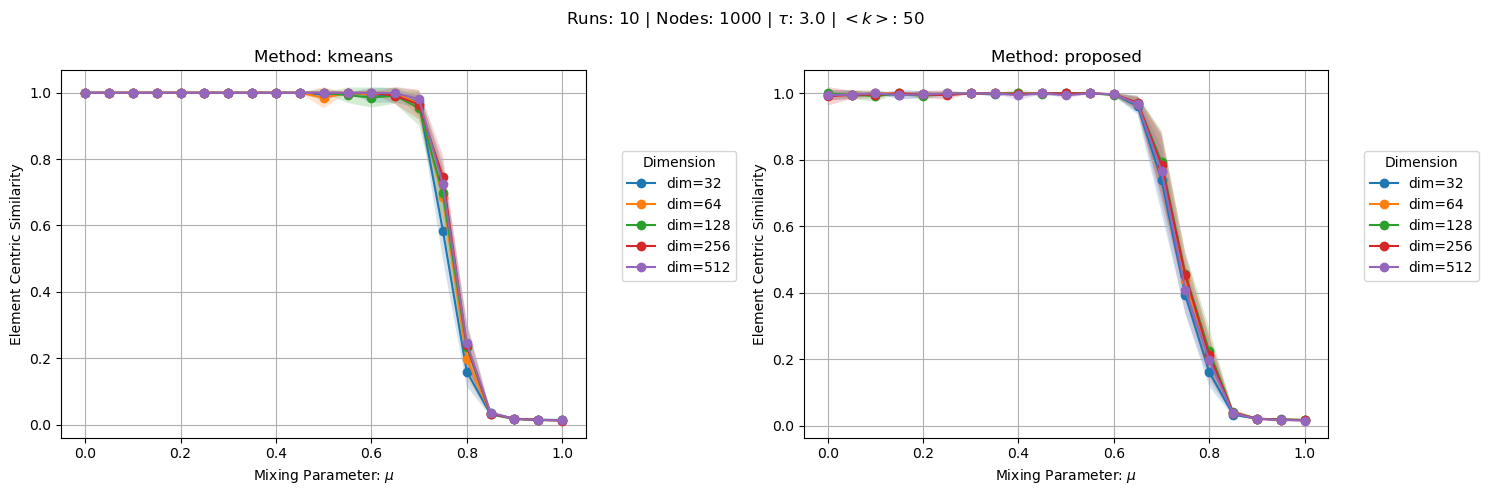

In [6]:
import matplotlib.pyplot as plt
#def plotting_mu_change(path_name, params):

csv_file_path = path_name + "/result_stream.csv"

result_df = pd.read_csv(csv_file_path)
runs = result_df['run_no'].unique()
df_grouped = result_df.groupby(['mu', 'dim']).agg(['mean', 'std'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for the "proposed" column

for i in range(len(axes)):
    ax0 = axes[i]
    for dim_value in df_grouped.index.levels[1]:
        index = [i for i,j in list(df_grouped.loc(axis=0)[:, dim_value][score_keys[i]]['mean'].index)]
        mean_values = df_grouped.loc(axis=0)[:, dim_value][score_keys[i]]['mean']
        std_values = df_grouped.loc(axis=0)[:, dim_value][score_keys[i]]['std']

        ax0.plot(index, mean_values, '-o', label=f'dim={dim_value}')
        ax0.fill_between(index, mean_values - std_values, mean_values + std_values, alpha=0.2)

    ax0.set_xlabel(r'Mixing Parameter: $\mu$')
    ax0.set_ylabel(f"Element Centric Similarity")
    ax0.legend(title="Dimension", loc='upper right', bbox_to_anchor=(1.3, 0.8))
    ax0.grid(True)
    ax0.set_title(f"Method: {score_keys[i]}")
    
plt.suptitle(rf'Runs: {len(runs)} | Nodes: {params["N"]} | $\tau$: {params["tau"]} | $<k>$: {params["k"]}')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(f"{path_name}/changing_dimensions_plot.png", bbox_inches='tight')
#plt.close()

#    returnzv